# Trabajo Practico Matematica III #

## Analisis de datos ##

La idea de este trabajo practico es el analisis de datos del siguiente archivo con formato .csv  -> **`corredores.csv`**.  

El nombre original del archivo era **`categorías de corredores.csv`** pero fue cambiado para acomodarse con la tarea en cuestion.  

Antes de iniciar con todo el analisis, es necesario importar todos los modulos necesarios para el trabajo.  

*tambien se desactivaron los warnings, de todas formas en los momentos en los que llegue a ocurrir algo indeceado será mencionado*

In [163]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.impute import SimpleImputer
import seaborn as sns
import warnings
#warnings.filterwarnings(action='ignore')

Procedemos a incorporar en el proyecto un *dataFrame* de los corredores y visualizamos los primeros 5 elementos, solamente para ver como se ve el *dataFrame*

In [164]:
dfCorredores = pd.read_csv('corredores.csv')
dfCorredores

,Unnamed: 0,place,gender,age,home,time,Velocidad
0,3475,3592,Male,52,GBR,217.483333,Regular
1,13594,13853,Female,40,NY,272.550000,Regular
2,12012,12256,Male,31,FRA,265.283333,Regular
3,10236,10457,Female,33,MI,256.150000,Regular
4,9476,9686,Male,33,NY,252.250000,Regular
...,...,...,...,...,...,...,...
995,15972,16261,Male,61,FRA,285.883333,Regular
996,1090,1131,Male,37,GBR,191.916667,Veloz
997,16419,16713,Female,53,IRL,289.016667,Regular
998,13977,14241,Female,21,NY,276.050000,Regular


Vemos que hay una columna sin nombre. Para solucionar esto cambiaremos el nombre y haremos algunas modificaciones para mejorar la prolijidad y presentación

In [165]:
dfCorredores.rename(columns={
    'Unnamed: 0':'ID',
    'place':'Place',
    'gender':'Gender',
    'age':'Age',
    'home':'Home',
    'time':'Time',
    'Velocidad':'Velocity'},
    inplace=True)

Una vez hecho esto, lo que haremos es hacer un display de los primeros y ultimos 15 corredores, para poder tener una vision general de los datos

In [166]:
dfCorredores.head(n=15)

,ID,Place,Gender,Age,Home,Time,Velocity
0,3475,3592,Male,52,GBR,217.483333,Regular
1,13594,13853,Female,40,NY,272.550000,Regular
2,12012,12256,Male,31,FRA,265.283333,Regular
3,10236,10457,Female,33,MI,256.150000,Regular
4,9476,9686,Male,33,NY,252.250000,Regular
5,1720,1784,Male,40,NJ,201.966667,Regular
6,15736,16020,Female,30,CA,283.566667,Regular
7,10580,10805,Male,27,GBR,255.883333,Regular
8,11957,12201,Male,42,NED,264.250000,Regular
9,18933,19266,Male,48,B.C,306.683333,Lento


In [167]:
dfCorredores.tail(n=15)

,ID,Place,Gender,Age,Home,Time,Velocity
985,20530,20877,Male,29,SUI,324.666667,Lento
986,13981,14245,Male,40,MA,273.700000,Regular
987,13190,13446,Female,37,IN,267.633333,Regular
988,1038,1079,Male,40,NED,191.316667,Veloz
989,13752,14013,Male,49,ITA,273.033333,Regular
990,23273,23645,Female,46,NY,501.550000,Lento
991,15901,16189,Female,51,TN,285.350000,Regular
992,14889,15162,Female,50,GER,278.116667,Regular
993,11547,11784,Female,40,NY,263.383333,Regular
994,4079,4206,Male,27,CAN,223.333333,Regular


## Analisis de las columnas

- ID - id del corredor
- Place - posicion del corredor
- Gender - genero del corredor
- Age - edad del corredor
- Home - pais del corredor
- Time - tiempo total en completar la carrera
- Velocity - velocidad en la que fueron

Una cosa que se ve es que la velocidad del corredor es dependiente del tiempo que tardo en completar la carrera.  

- Si el corredor tuvo un **tiempo mayor o igual a 300**, es considerado **Lento**  
- Si el corredor tuvo un **tiempo mayor o igual a 200**, es considerado **Regular**  
- Si el corredor tuvo un **tiempo menor a 200**, es considerado **Veloz**

## Analisis de los datos

Por lo que se puede apreciar, ahora podemos hacer, por ejemplo un describe de las columnas que presenta el *dataFrame*

### Describe()

In [168]:
dfCorredores.describe()

,ID,Place,Age,Time
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,11763.113000,11992.319000,39.100000,268.570700
std,6761.839631,6858.858466,10.675391,53.550743
min,53.000000,54.000000,5.000000,147.333333
25%,5936.000000,6095.000000,31.000000,233.775000
50%,11722.000000,11962.000000,38.000000,262.841667
75%,17600.500000,17921.750000,46.000000,294.854167
max,23290.000000,23662.000000,81.000000,566.783333


### Shape

In [169]:
dfCorredores.shape

(1000, 7)

### NaN o Null

Corroboremos si es que existe algunos datos *nulos* o *NaN* en el *dataFrame*

In [192]:
dfCorredores.isnull().any()

ID          False
Place       False
Gender      False
Age         False
Home        False
Time        False
Velocity    False
dtype: bool

Como existen algunos datos nulos vamos a proceder a sacarlos de la lista

In [195]:

dfCorredores = dfCorredores.dropna(axis=0,how='any')
dfCorredores

,ID,Place,Gender,Age,Home,Time,Velocity
0,3475,3592,Male,52,GBR,217.483333,Regular
1,13594,13853,Female,40,NY,272.550000,Regular
2,12012,12256,Male,31,FRA,265.283333,Regular
3,10236,10457,Female,33,MI,256.150000,Regular
4,9476,9686,Male,33,NY,252.250000,Regular
...,...,...,...,...,...,...,...
995,15972,16261,Male,61,FRA,285.883333,Regular
996,1090,1131,Male,37,GBR,191.916667,Veloz
997,16419,16713,Female,53,IRL,289.016667,Regular
998,13977,14241,Female,21,NY,276.050000,Regular


Corroboro que no existen datos nulos

In [196]:
dfCorredores.isnull().any()

ID          False
Place       False
Gender      False
Age         False
Home        False
Time        False
Velocity    False
dtype: bool

## Matriz de correlación  

Ahora procedamos a crear una matriz de correlación entre los datos del *dataFrame* :rage3:

In [197]:
corrCorredores = dfCorredores.corr()

Corroboramos la integridad de los datos obtenidos

In [198]:
corrCorredores

,ID,Place,Age,Time
ID,1.000000,0.999997,0.150861,0.929486
Place,0.999997,1.000000,0.150719,0.929348
Age,0.150861,0.150719,1.000000,0.192934
Time,0.929486,0.929348,0.192934,1.000000


<AxesSubplot: >

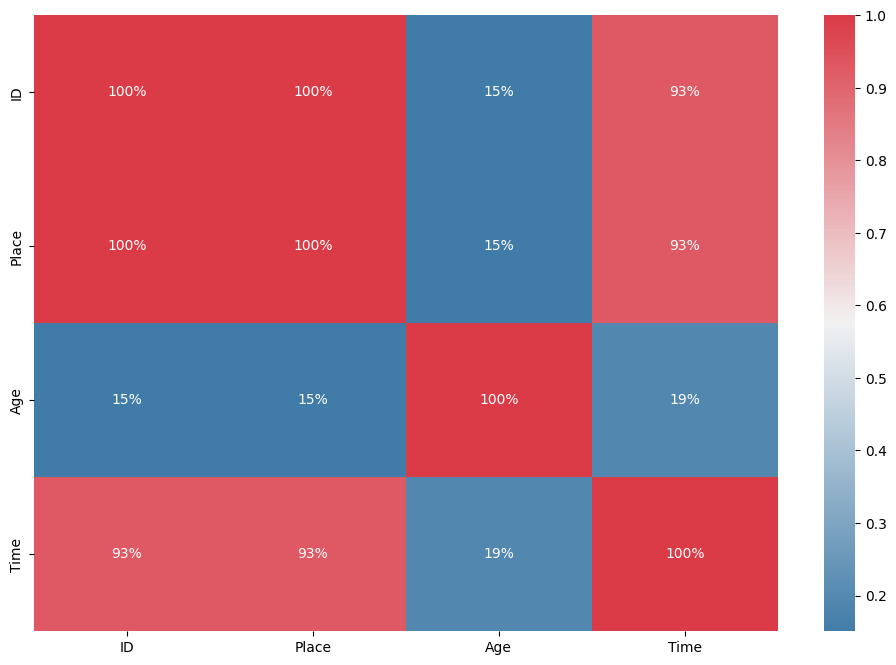

In [200]:
plt.subplots(figsize=(12,8))
sns.heatmap(corrCorredores, xticklabels=corrCorredores.columns, yticklabels=corrCorredores.columns, annot=True, fmt='.0%',
            cmap=sns.diverging_palette(240, 10, as_cmap=True)) 

Podemos observar que se perdieron algunas columnas.
Debido a esto, necesitaremos una forma de transformar los datos de estas columnas en algo manejable.  

De todas formas vale aclarar que para esto en especifico se creara una variable aparte que se usara para este caso. Hay ciertos datos de esta tabla que luego seran utilizados para analisis predictivo, por lo que no necesitaremos de este dato mas adelante.

### Matriz de correlacion - Cambio de datos del Corr

In [203]:
dfCorrCorredores = dfCorredores.copy()
dfCorrCorredores['Place']=dfCorrCorredores['Place'].astype('category').cat.codes
dfCorrCorredores['Home']=dfCorrCorredores['Home'].astype('category').cat.codes
dfCorrCorredores['Velocity']=dfCorrCorredores['Velocity'].astype('category').cat.codes
corrCorredores = dfCorrCorredores.corr()

<AxesSubplot: >

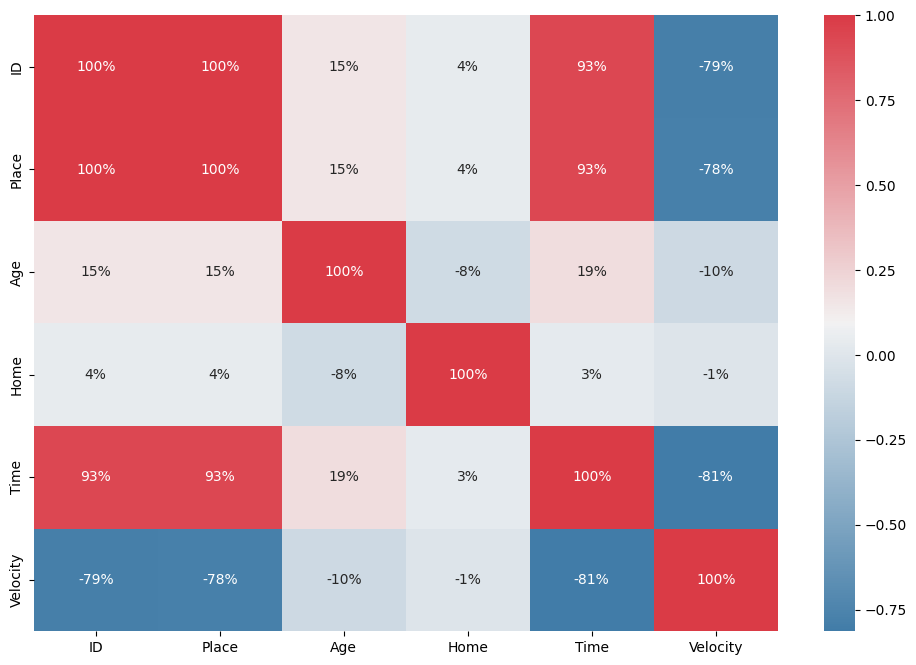

In [204]:
plt.subplots(figsize=(12,8))
sns.heatmap(corrCorredores, xticklabels=corrCorredores.columns, yticklabels=corrCorredores.columns, annot=True, fmt='.0%',
            cmap=sns.diverging_palette(240, 10, as_cmap=True)) 

In [206]:
corrCorredores['Velocity'].abs().sort_values(ascending=False)

Velocity    1.000000
Time        0.813946
ID          0.785664
Place       0.783791
Age         0.096890
Home        0.007077
Name: Velocity, dtype: float64